# LOFO Feature Importance
https://github.com/aerdem4/lofo-importance

In [1]:
!pip install lofo-importance

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("../input/train.csv", index_col='id')
df['wheezy-copper-turtle-magic'] = df['wheezy-copper-turtle-magic'].astype('category')
df.shape

(262144, 257)

### Use the best model in public kernels

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

def get_model():
    return Pipeline([('scaler', StandardScaler()),
                    ('qda', QuadraticDiscriminantAnalysis(reg_param=0.111))
                   ])

### Top 20 Features for wheezy-copper-turtle-magic = 0

/opt/conda/lib/python3.6/site-packages/lofo/lofo_importance.py:32: UserWarning: Warning: If your model is multithreaded, please initialise the number                 of jobs of LOFO to be equal to 1, otherwise you may experience issues.
  warnings.warn(warning_str)


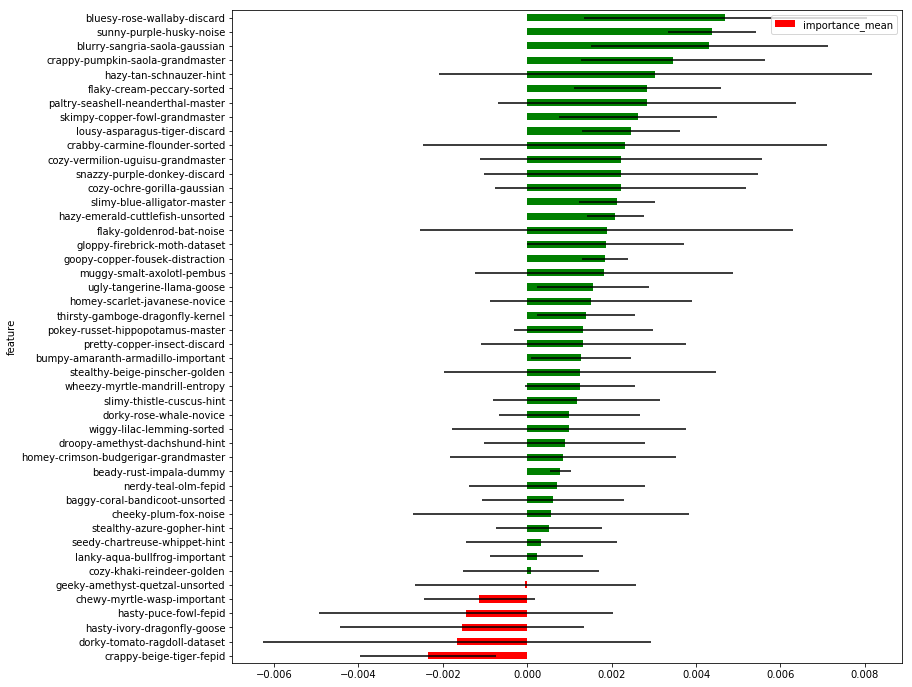

In [4]:
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from lofo import LOFOImportance, FLOFOImportance, plot_importance


features = [c for c in df.columns if c not in ['id', 'target', 'wheezy-copper-turtle-magic']]


def get_lofo_importance(wctm_num):
    sub_df = df[df['wheezy-copper-turtle-magic'] == wctm_num]
    sub_features = [f for f in features if sub_df[f].std() > 1.5]
    lofo_imp = LOFOImportance(sub_df, target="target",
                              features=sub_features, 
                              cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True), scoring="roc_auc",
                              model=get_model(), n_jobs=4)
    return lofo_imp.get_importance()

plot_importance(get_lofo_importance(0), figsize=(12, 12))

### Top 20 Features for wheezy-copper-turtle-magic = 1

/opt/conda/lib/python3.6/site-packages/lofo/lofo_importance.py:32: UserWarning: Warning: If your model is multithreaded, please initialise the number                 of jobs of LOFO to be equal to 1, otherwise you may experience issues.
  warnings.warn(warning_str)


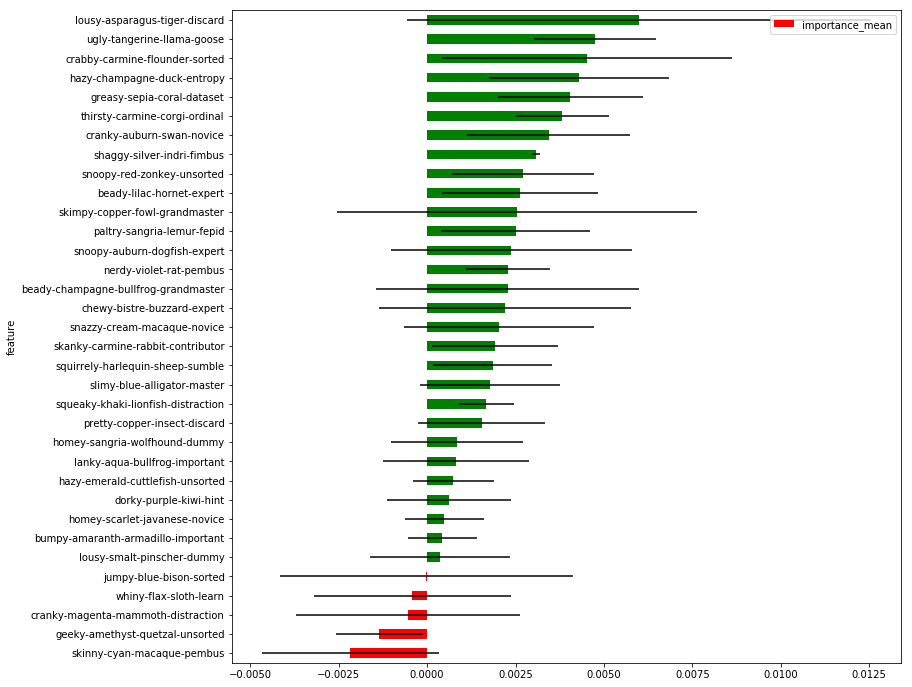

In [5]:
plot_importance(get_lofo_importance(1), figsize=(12, 12))

### Top 20 Features for wheezy-copper-turtle-magic = 2

/opt/conda/lib/python3.6/site-packages/lofo/lofo_importance.py:32: UserWarning: Warning: If your model is multithreaded, please initialise the number                 of jobs of LOFO to be equal to 1, otherwise you may experience issues.
  warnings.warn(warning_str)


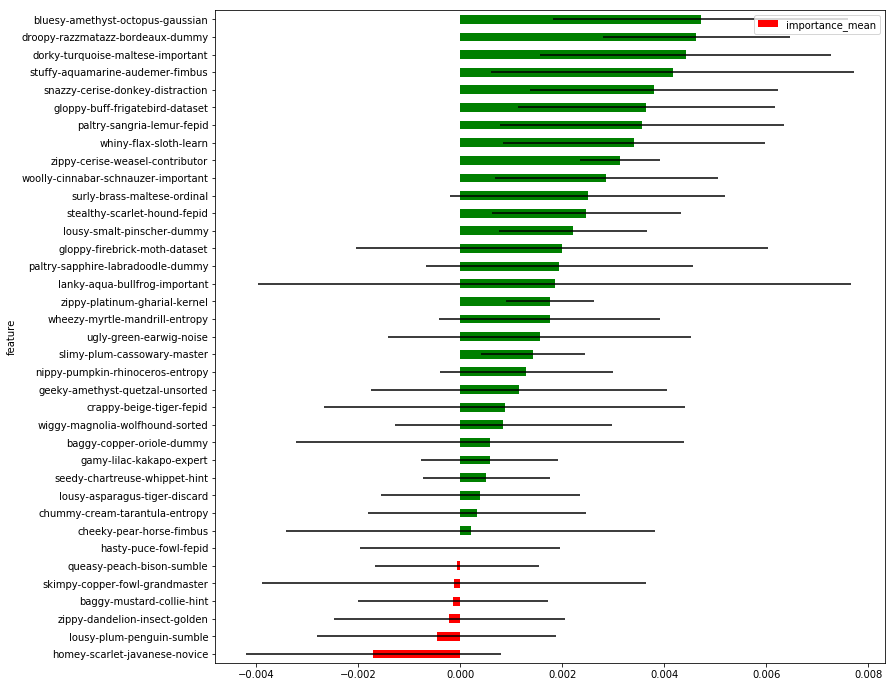

In [6]:
plot_importance(get_lofo_importance(2), figsize=(12, 12))

### Find the most harmful features for each wheezy-copper-turtle-magic

In [7]:
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings("ignore")

features_to_remove = []
potential_gain = []

for i in tqdm_notebook(range(512)):
    imp = get_lofo_importance(i)
    features_to_remove.append(imp["feature"].values[-1])
    potential_gain.append(-imp["importance_mean"].values[-1])
    
print("Potential gain (AUC):", np.round(np.mean(potential_gain), 5))


Potential gain (AUC): 0.00193


In [8]:
features_to_remove

['crappy-beige-tiger-fepid',
 'skinny-cyan-macaque-pembus',
 'homey-scarlet-javanese-novice',
 'freaky-olive-insect-ordinal',
 'dorky-amaranth-eel-grandmaster',
 'cheeky-plum-fox-noise',
 'sleazy-russet-iguana-unsorted',
 'zippy-harlequin-otter-grandmaster',
 'scanty-periwinkle-dhole-dataset',
 'skinny-yellow-hedgehog-sumble',
 'gloppy-denim-ostrich-gaussian',
 'skanky-puce-discus-contributor',
 'gamy-plum-tarsier-kernel',
 'paltry-red-hamster-sorted',
 'messy-cardinal-lemur-distraction',
 'paltry-sangria-lemur-fepid',
 'sleazy-cinnamon-frog-grandmaster',
 'stealthy-chocolate-urchin-kernel',
 'woolly-gold-millipede-fimbus',
 'paltry-seashell-neanderthal-master',
 'gloppy-denim-ostrich-gaussian',
 'cheeky-pear-horse-fimbus',
 'droopy-razzmatazz-bordeaux-dummy',
 'paltry-sangria-lemur-fepid',
 'squeaky-khaki-lionfish-distraction',
 'baggy-champagne-capuchin-discard',
 'skanky-cobalt-dolphin-sorted',
 'crabby-teal-otter-unsorted',
 'beady-asparagus-opossum-expert',
 'sunny-purple-husky-no

# Create submission using the current best kernel
https://www.kaggle.com/tunguz/ig-pca-nusvc-knn-qda-lr-stack by Bojan Tunguz

In [9]:
import numpy as np, pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn import svm, neighbors, linear_model, neural_network
from sklearn.svm import NuSVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tqdm import tqdm
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import VarianceThreshold

train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

oof_svnu = np.zeros(len(train)) 
pred_te_svnu = np.zeros(len(test))

oof_svc = np.zeros(len(train)) 
pred_te_svc = np.zeros(len(test))

oof_knn = np.zeros(len(train)) 
pred_te_knn = np.zeros(len(test))

oof_lr = np.zeros(len(train)) 
pred_te_lr = np.zeros(len(test))

oof_mlp = np.zeros(len(train)) 
pred_te_mlp = np.zeros(len(test))

oof_qda = np.zeros(len(train)) 
pred_te_qda = np.zeros(len(test))

default_cols = [c for c in train.columns if c not in ['id', 'target', 'wheezy-copper-turtle-magic']]

for i in range(512):
    cols = [c for c in default_cols if c != features_to_remove[i]]
    
    train2 = train[train['wheezy-copper-turtle-magic']==i]
    test2 = test[test['wheezy-copper-turtle-magic']==i]
    idx1 = train2.index; idx2 = test2.index
    train2.reset_index(drop=True,inplace=True)

    data = pd.concat([pd.DataFrame(train2[cols]), pd.DataFrame(test2[cols])])
    data2 = StandardScaler().fit_transform(PCA(svd_solver='full',n_components='mle').fit_transform(data[cols]))
    train3 = data2[:train2.shape[0]]; test3 = data2[train2.shape[0]:]
    
    data2 = StandardScaler().fit_transform(VarianceThreshold(threshold=1.5).fit_transform(data[cols]))
    train4 = data2[:train2.shape[0]]; test4 = data2[train2.shape[0]:]
    
    # STRATIFIED K FOLD (Using splits=25 scores 0.002 better but is slower)
    skf = StratifiedKFold(n_splits=5, random_state=42)
    for train_index, test_index in skf.split(train2, train2['target']):

        clf = NuSVC(probability=True, kernel='poly', degree=4, gamma='auto', random_state=4, nu=0.59, coef0=0.053)
        clf.fit(train3[train_index,:],train2.loc[train_index]['target'])
        oof_svnu[idx1[test_index]] = clf.predict_proba(train3[test_index,:])[:,1]
        pred_te_svnu[idx2] += clf.predict_proba(test3)[:,1] / skf.n_splits
        
        clf = neighbors.KNeighborsClassifier(n_neighbors=17, p=2.9)
        clf.fit(train3[train_index,:],train2.loc[train_index]['target'])
        oof_knn[idx1[test_index]] = clf.predict_proba(train3[test_index,:])[:,1]
        pred_te_knn[idx2] += clf.predict_proba(test3)[:,1] / skf.n_splits
        
        clf = linear_model.LogisticRegression(solver='saga',penalty='l1',C=0.1)
        clf.fit(train3[train_index,:],train2.loc[train_index]['target'])
        oof_lr[idx1[test_index]] = clf.predict_proba(train3[test_index,:])[:,1]
        pred_te_lr[idx2] += clf.predict_proba(test3)[:,1] / skf.n_splits
        
        clf = neural_network.MLPClassifier(random_state=3,  activation='relu', solver='lbfgs', tol=1e-06, hidden_layer_sizes=(250, ))
        clf.fit(train3[train_index,:],train2.loc[train_index]['target'])
        oof_mlp[idx1[test_index]] = clf.predict_proba(train3[test_index,:])[:,1]
        pred_te_mlp[idx2] += clf.predict_proba(test3)[:,1] / skf.n_splits
        
        clf = svm.SVC(probability=True, kernel='poly', degree=4, gamma='auto', random_state=42)
        clf.fit(train3[train_index,:],train2.loc[train_index]['target'])
        oof_svc[idx1[test_index]] = clf.predict_proba(train3[test_index,:])[:,1]
        pred_te_svc[idx2] += clf.predict_proba(test3)[:,1] / skf.n_splits
        
        clf = QuadraticDiscriminantAnalysis(reg_param=0.111)
        clf.fit(train4[train_index,:],train2.loc[train_index]['target'])
        oof_qda[idx1[test_index]] = clf.predict_proba(train4[test_index,:])[:,1]
        pred_te_qda[idx2] += clf.predict_proba(test4)[:,1] / skf.n_splits
        
        
print('lr', roc_auc_score(train['target'], oof_lr))
print('knn', roc_auc_score(train['target'], oof_knn))
print('svc', roc_auc_score(train['target'], oof_svc))
print('svcnu', roc_auc_score(train['target'], oof_svnu))
print('mlp', roc_auc_score(train['target'], oof_mlp))
print('qda', roc_auc_score(train['target'], oof_qda))
print('blend 1', roc_auc_score(train['target'], oof_svnu*0.7 + oof_svc*0.05 + oof_knn*0.2 + oof_mlp*0.05))
print('blend 2', roc_auc_score(train['target'], oof_qda*0.5+oof_svnu*0.35 + oof_svc*0.025 + oof_knn*0.1 + oof_mlp*0.025))

oof_svnu = oof_svnu.reshape(-1, 1)
pred_te_svnu = pred_te_svnu.reshape(-1, 1)
oof_svc = oof_svc.reshape(-1, 1)
pred_te_svc = pred_te_svc.reshape(-1, 1)
oof_knn = oof_knn.reshape(-1, 1)
pred_te_knn = pred_te_knn.reshape(-1, 1)
oof_mlp = oof_mlp.reshape(-1, 1)
pred_te_mlp = pred_te_mlp.reshape(-1, 1)
oof_lr = oof_lr.reshape(-1, 1)
pred_te_lr = pred_te_lr.reshape(-1, 1)
oof_qda = oof_qda.reshape(-1, 1)
pred_te_qda = pred_te_qda.reshape(-1, 1)

tr = np.concatenate((oof_svnu, oof_svc, oof_knn, oof_mlp, oof_lr, oof_qda), axis=1)
te = np.concatenate((pred_te_svnu, pred_te_svc, pred_te_knn, pred_te_mlp, pred_te_lr, pred_te_qda), axis=1)
print(tr.shape, te.shape)

oof_lrr = np.zeros(len(train)) 
pred_te_lrr = np.zeros(len(test))
skf = StratifiedKFold(n_splits=5, random_state=42)

for train_index, test_index in skf.split(tr, train['target']):
    lrr = linear_model.LogisticRegression()
    lrr.fit(tr[train_index], train['target'][train_index])
    oof_lrr[test_index] = lrr.predict_proba(tr[test_index,:])[:,1]
    pred_te_lrr += lrr.predict_proba(te)[:,1] / skf.n_splits
    
print('stack CV score =',round(roc_auc_score(train['target'],oof_lrr),6))

sub = pd.read_csv('../input/sample_submission.csv')

sub['target'] = pred_te_lrr
sub.to_csv('submission_stack.csv', index=False)

lr 0.7901407862361566
knn 0.901633622333561
svc 0.9496503365943687
svcnu 0.9602108357063215
mlp 0.9099796548042899
qda 0.964571203144288
blend 1 0.9606802597192573
blend 2 0.9658315272570789
(262144, 6) (131073, 6)
stack CV score = 0.965869
